In [42]:
import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

In [250]:
x = np.linspace(-10.0, 10.0, 100)

In [251]:
w = np.random.uniform(-1, 1, size=[10, 2])
w

array([[-0.65803256, -0.22599803],
       [ 0.51700326,  0.15309804],
       [ 0.77677209, -0.20834325],
       [ 0.21259476, -0.03134149],
       [-0.76390724,  0.96767527],
       [-0.37632362, -0.36276386],
       [ 0.88383998,  0.8024917 ],
       [ 0.77575657,  0.4991352 ],
       [ 0.90255402,  0.77014287],
       [-0.81523068, -0.26341855]])

In [252]:
def sigmoid(x):
    return 1/(1+np.exp(x))

In [253]:
def activation_func(x, name='sigmoid'):
    if name == 'sigmoid':
        return tf.nn.sigmoid(x).numpy()
    elif name == 'tanh':
        return tf.nn.tanh(x).numpy()
    elif name == 'relu':
        return tf.nn.relu(x).numpy()
    elif name == 'lrelu':
        return tf.nn.leaky_relu(x, alpha=.5).numpy()
    else:
        raise ValueError('Unknown actimation function passed!')

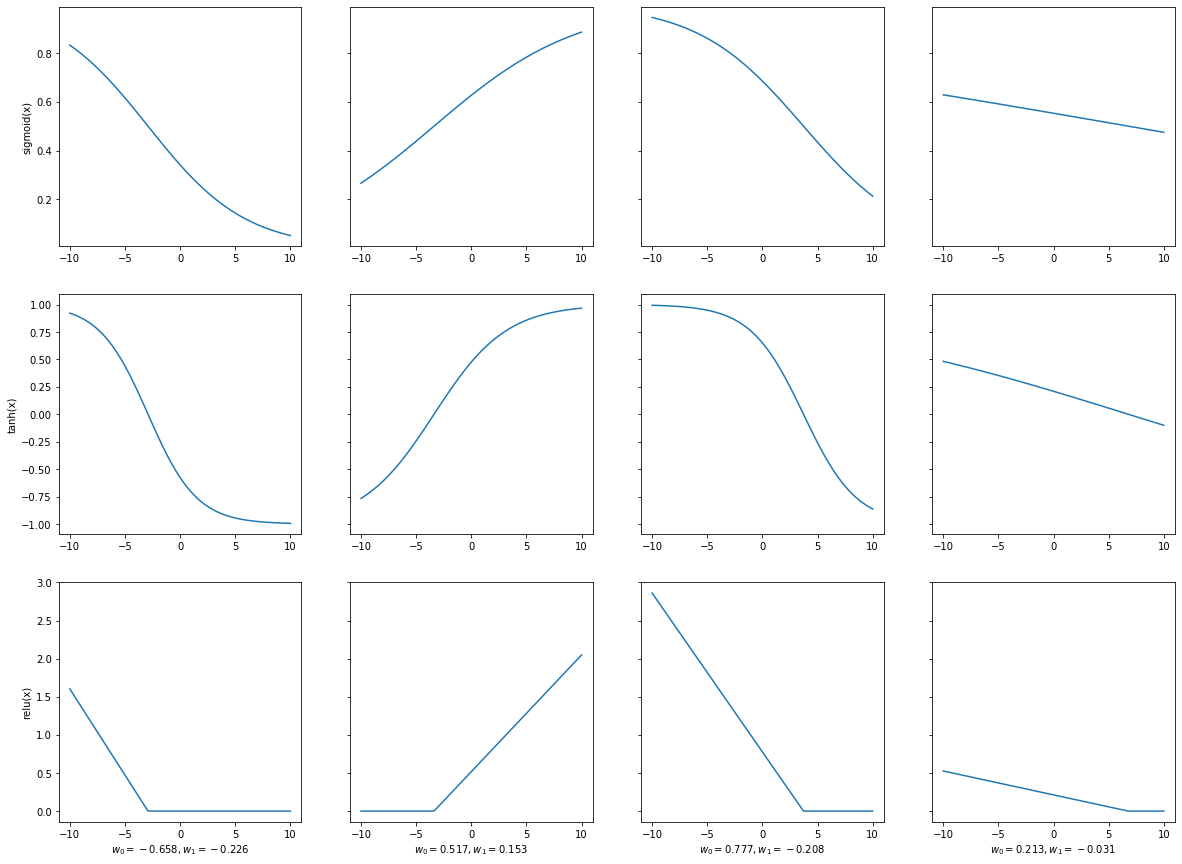

In [254]:
fig, axs = plt.subplots(3, 4, figsize=(20,15), sharey='row')

activations = ['sigmoid', 'tanh', 'relu']
for j, activation in enumerate(activations):
    for i in range(4):
        if i == 0:
            y = activation_func(x, activation)
        y = activation_func(w[i][0] + x*w[i][1], activation)
        axs[j][i].plot(x,y)
        plt.setp(axs[-1, i], xlabel="$w_0={}, w_1={}$".format(np.round(w[i][0],3), np.round(w[i][1],3))) 
    plt.setp(axs[j, 0], ylabel=activation+"(x)") 

In [255]:
fig.savefig('activation.png', dpi=400)

In [214]:
x1 = np.hstack([np.ones([500, 1]) , np.random.uniform(-10.0, 10.0,size=[500, 4])])
x1.shape

(500, 5)

In [228]:
w = np.random.uniform(-1, 1., size=[10, 5])
w

array([[ 0.56713105, -0.14543068, -0.13274789,  0.53762494, -0.9947371 ],
       [-0.44833642,  0.73954716, -0.33234485,  0.94958873, -0.60388278],
       [ 0.8747446 ,  0.56590459, -0.24443448,  0.95819251,  0.16096876],
       [ 0.75547867, -0.8800555 , -0.48574053, -0.54900841, -0.35384447],
       [-0.21989501,  0.72725194,  0.32071642, -0.61168718,  0.66871293],
       [ 0.56603481, -0.06526998,  0.34370597, -0.68643495,  0.2805821 ],
       [-0.88514098, -0.90148208,  0.08741625, -0.32239037,  0.9244652 ],
       [ 0.61244784, -0.48210082, -0.28483775,  0.14510185, -0.37427101],
       [-0.31424499,  0.94349464, -0.2317    ,  0.30022535, -0.21549756],
       [-0.88834736, -0.32572903,  0.38065261, -0.13738161, -0.44667672]])

In [225]:
s = []
for i in range(5):
    s.append(np.sort(np.sum(x1*w[i], axis=1)))

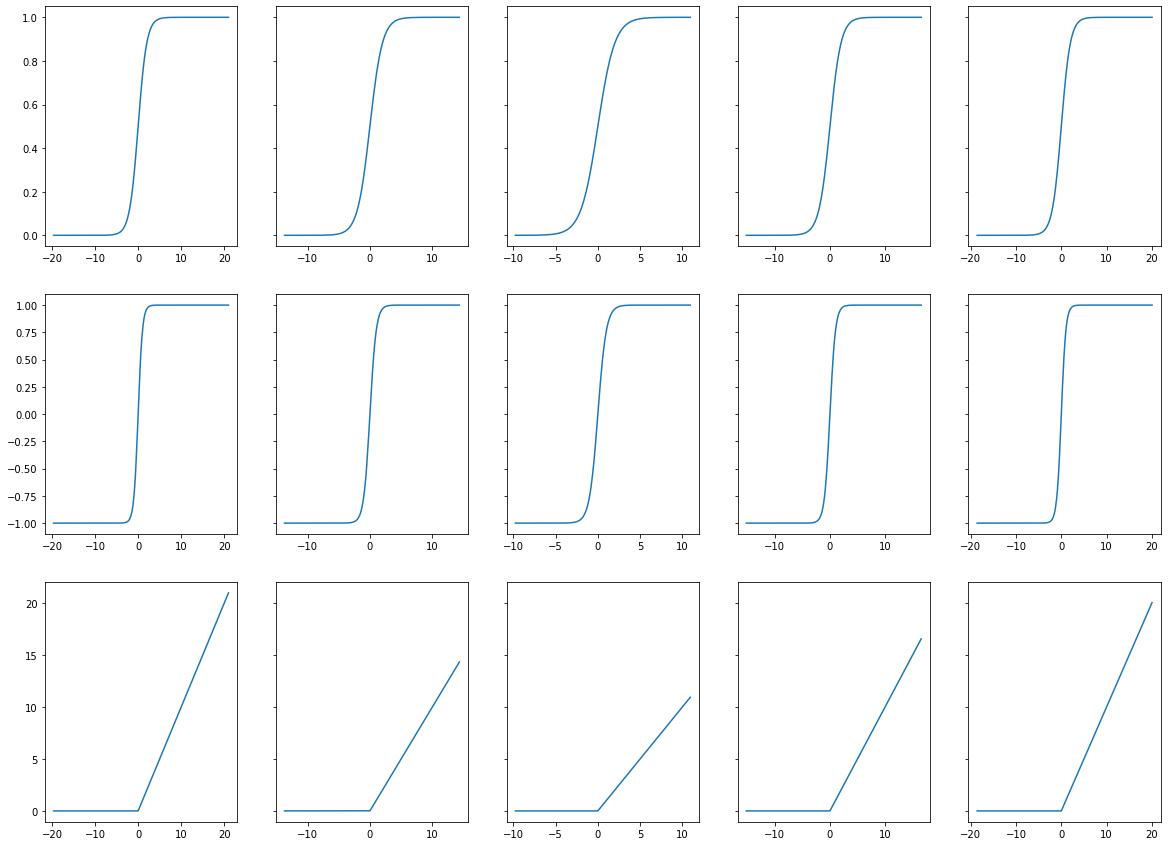

In [226]:
fig, axs = plt.subplots(3, 5, figsize=(20,15), sharey='row')

activations = ['sigmoid', 'tanh', 'relu']
for j, activation in enumerate(activations):
    for i in range(5):        
        y = activation_func(s[i], activation)
        axs[j][i].plot(s[i],y)